# User Input

In [34]:
# data_path is the full path to the folder with all the data sets to be processed
data_path = 'D:\LOCI\Embedding\data_t'

# ij_local_installation is the full path to your local FIJI install with FLIMJ
ij_local_installation = 'D:\Fiji.app'

# pixel_count_threshold is used to determine if a frame is valid for inclusion in the mean fluorescence intensity analysis
pixel_count_threshold = 50000

# Color for graphing the data
bar_color = 'black'

# Color for graphing the error bars of the data
error_bar_color = 'red'

# Dependencies

In [22]:
import os
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
#import imagej
from PIL import Image, ImageSequence

# File Discovery

In [3]:
# Get the Data Set Names
list_names = []

for (root, dirs, files) in os.walk(data_path):
    list_names = dirs
    break
    
print('Embedding Methods Tested:')    
print(list_names)
print('---------------')


# Get Number of Data Sets
num_data_sets = len(list_names)


# Get the list of files per data set 
list_files = []
for i in range(num_data_sets):
    temp_list = []
    list_files.append([])
    
    for (root, dirs, files) in os.walk(data_path + os.path.sep + list_names[i]):
        if files != []:
            for j in files:
                # Need to differentiate pollen grain sample vs. structure being tested
                if 'pollen' not in str.lower(root) and 'polen' not in str.lower(root) and os.path.splitext(j)[1] == '.tiff':
                    temp_list.append(root + os.path.sep + j)
                    print(os.path.splitext(j))
    
    list_files[i].append(temp_list)
    print(str(len(temp_list)) + ' Images found for ' + list_names[i])
    print('-----------------')
    
    

# Initialize ImageJ Instance
#ij = imagej.init(ij_local_installation,headless=True)

Embedding Methods Tested:
['LR White', 'Raw', 'SPURR']
---------------
('LRwhite-struct-1_C1_TP0_SP0_FW0.ome', '.tiff')
('LRwhite-struct-2_C1_TP0_SP0_FW0.ome', '.tiff')
('LRwhite-struct-3_C1_TP0_SP0_FW0.ome', '.tiff')
('LRwhite-struct-4_C1_TP0_SP0_FW0.ome', '.tiff')
('LRwhite-struct-5_C1_TP0_SP0_FW0.ome', '.tiff')
5 Images found for LR White
-----------------
('pbs-raw-struct-1_C1_TP0_SP0_FW0.ome', '.tiff')
('pbs-raw-struct-2_C1_TP0_SP0_FW0.ome', '.tiff')
('pbs-raw-struct-3_C1_TP0_SP0_FW0.ome', '.tiff')
('pbs-raw-struct-4_C1_TP0_SP0_FW0.ome', '.tiff')
('pbs-raw-struct-5_C1_TP0_SP0_FW0.ome', '.tiff')
('pbs-raw-struct-6_C1_TP0_SP0_FW0.ome', '.tiff')
6 Images found for Raw
-----------------
('SPURR_struct_1_C1_TP0_SP0_FW0.ome', '.tiff')
('SPURR_Struct_2_C1_TP0_SP0_FW0.ome', '.tiff')
('SPURR_struct_3_C1_TP0_SP0_FW0.ome', '.tiff')
('SPURR_struct_4_C1_TP0_SP0_FW0.ome', '.tiff')
('SPURR_struct_5_C1_TP0_SP0_FW0.ome', '.tiff')
5 Images found for SPURR
-----------------


# Mean Fluorescence Intensity Comparison and Image Quality Analysis

In [17]:
# Initialize Storage Variables
mean_fluorescence_raw = []
image_quality_raw = []

# Iterate across all data sets
for i in range(num_data_sets):
    
    temp_mean_fl_raw = []
    temp_img_qlty_raw = []
    
    temp_list_files = list_files[i][0]
    
    # Iterate on each image within a data set
    for j in temp_list_files:
        
        temp_slice_mean_fl_raw = []
        temp_slice_img_qlty_raw = []
        
        # Load Image Stack
        temp_img_stack = Image.open(j)
        
        # Iterate on each Z-Slice
        for frame in ImageSequence.Iterator(temp_img_stack):
            temp_img = np.array(frame)
            
            # Mean Fluorescence Intensity
            thresh = skimage.filters.threshold_otsu(temp_img)
            bin_mask = temp_img > thresh
            img_pixels = np.count_nonzero(bin_mask)
            
            # Check that enough pixels are present to accurately estimate
            if img_pixels > pixel_count_threshold:
                selection = temp_img.copy()
                selection[~bin_mask] = 0
                
                temp_slice_mean_fl_raw.append(np.sum(selection) / img_pixels)
            
            
            # Image Quality Analysis
            
            temp_iq_value = 0
            
            
            
            temp_slice_img_qlty_raw.append(temp_iq_value)
            
        # Mean Fluorescence Intensity Peak Value
        temp_mean_fl_raw.append(max(temp_slice_mean_fl_raw))
    
        # Image Quality Analysis Peak Score
        temp_img_qlty_raw.append(max(temp_slice_img_qlty_raw))
        
        
    # Store Raw Values
    mean_fluorescence_raw.append(temp_mean_fl_raw)
    image_quality_raw.append(temp_img_qlty_raw)
    
    print(list_names[i])
    print('Raw Mean Fluorescence Intensity:')
    print(temp_mean_fl_raw)
    print('Raw Mean Image Quality:')
    print(temp_img_qlty_raw)
    print('--------------------')

LR White
Raw Mean Fluorescence Intensity:
[121.77803650624651, 54.4894852200699, 95.55290486384229, 88.59967726186721, 92.85462666138386]
Raw Mean Image Quality:
[0, 0, 0, 0, 0]
--------------------
Raw
Raw Mean Fluorescence Intensity:
[21.596741669803976, 49.39465868669188, 51.03468166100021, 67.3267054072603, 74.52746544639521, 61.83449909747292]
Raw Mean Image Quality:
[0, 0, 0, 0, 0, 0]
--------------------
SPURR
Raw Mean Fluorescence Intensity:
[39.661554552963295, 27.86295198862952, 46.68085602438932, 13.737888092483828, 50.6155097679727]
Raw Mean Image Quality:
[0, 0, 0, 0, 0]
--------------------


# Results

LR White
Fluorescence Intensity, mean =  90.65 , std dev =  24.03
Image Quality, mean =  0 , std dev =  0.0
--------------------
Raw
Fluorescence Intensity, mean =  54.29 , std dev =  18.65
Image Quality, mean =  0 , std dev =  0.0
--------------------
SPURR
Fluorescence Intensity, mean =  35.71 , std dev =  15.02
Image Quality, mean =  0 , std dev =  0.0
--------------------


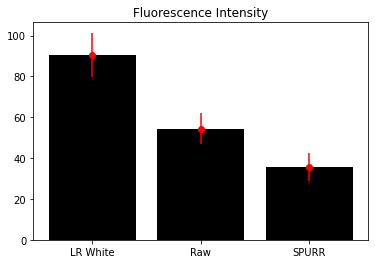

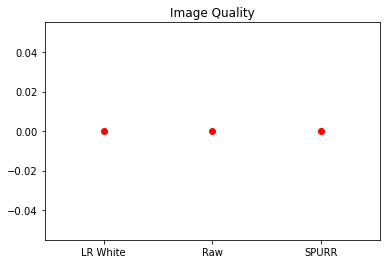

In [37]:
# Calculate Mean, Std Deviation, and Std Error of Data Sets
mean_fluorescence_mean = []
image_quality_mean = []

mean_fluorescence_stdev = []
image_quality_stdev = []

mean_fluorescence_stderror = []
image_quality_stderror = []

for i in range(num_data_sets):
    
    # Get Mean
    mean_fluorescence_mean.append(statistics.mean(mean_fluorescence_raw[i]))
    image_quality_mean.append(statistics.mean(image_quality_raw[i]))
    
    # Get Standard Deviation
    mean_fluorescence_stdev.append(statistics.stdev(mean_fluorescence_raw[i]))
    image_quality_stdev.append(statistics.stdev(image_quality_raw[i]))
    
    # Get Standard Error
    mean_fluorescence_stderror.append(mean_fluorescence_stdev[i] / math.sqrt(len(mean_fluorescence_raw[i])))
    image_quality_stderror.append(image_quality_stdev[i] / math.sqrt(len(image_quality_raw[i])))
    
    
    # Print Numerical Results
    print(list_names[i])
    print("Fluorescence Intensity, mean = ", round(mean_fluorescence_mean[i],2), ", std dev = ", round(mean_fluorescence_stdev[i],2))
    print("Image Quality, mean = ", round(image_quality_mean[i],2), ", std dev = ", round(image_quality_stdev[i],2))
    print('--------------------')

    
    
# Plot Mean Results with Std Dev Bars and Labels Scrounged from Folder Titles

plt.figure(num=1)
plt.bar(list_names, mean_fluorescence_mean, color=bar_color)
plt.errorbar(list_names, mean_fluorescence_mean, yerr = mean_fluorescence_stderror, xerr=None, color=error_bar_color, fmt='o')
plt.title('Fluorescence Intensity')
plt.show()

plt.figure(num=2)
plt.bar(list_names, image_quality_mean, color=bar_color)
plt.errorbar(list_names, image_quality_mean, yerr = image_quality_stderror, xerr=None, color=error_bar_color, fmt='o')
plt.title('Image Quality')
plt.show()

### Close the JVM ImageJ Instance

In [5]:
ij.dispose()